# Exploratory Data Analysis


## Importing in the python libraries

In [1]:
# Data processing
import pandas as pd
# Lineaer algebra library
import numpy as np
# Data visualisation
import matplotlib.pyplot as plt
# Statistical data visualisation
import seaborn as sns
%matplotlib inline

## Read in the data

## Data Description

We will use a data frame with 777 observations on the following 18 variables.
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Percentage of new students from top 10% of H.S. class
* Top25perc: Percentage of new students from top 25% of H.S. class
* F.Undergrad: Number of full time undergraduates
* P.Undergrad: Number of part time undergraduates
* Outstate: Out-of-state tuition cost
* Room.Board: Room and boarding costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Percentage of faculty with Ph.D.’s
* Terminal: Percentage of faculty with terminal degree
* S.F.Ratio: Student to faculty ratio
* perc.alumni: Percentage of alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

In [2]:
df = pd.read_csv('College_Data_new.csv')

## Check the data that was read in

In [3]:
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df.info()
#Check non null values and object. Sometimes working with dates, must convert them to datetime objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


## Are schools with higher out-of-state tuition (Outstate) also the ones that have higher room and boarding costs (Room.Board)?


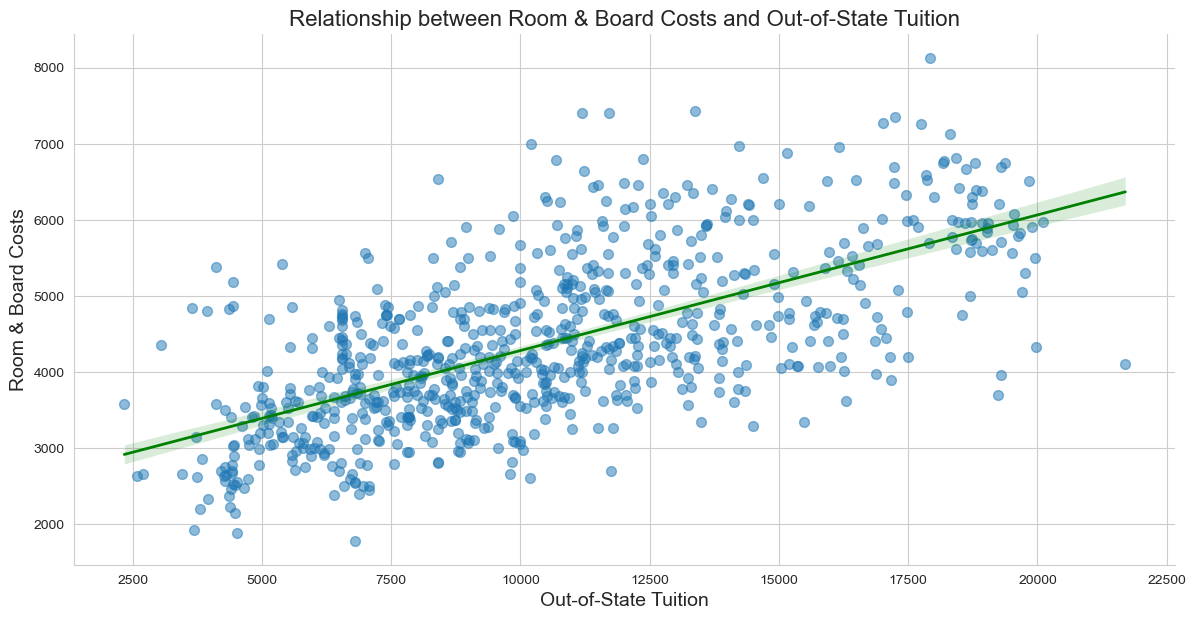

In [5]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='Outstate', y='Room.Board', height=6, aspect=2, 
           scatter_kws={'s': 50, 'alpha': 0.5}, # 's' is size of scatter points, 'alpha' is the transparency
           line_kws={'color': 'green', 'lw': 2}   # 'color' is color of line, 'lw' is line width
          )

# Set title and labels with enhanced font sizes
plt.title('Relationship between Room & Board Costs and Out-of-State Tuition', fontsize=16)
plt.xlabel('Out-of-State Tuition', fontsize=14)
plt.ylabel('Room & Board Costs', fontsize=14)
plt.show()

## How does the extent of alumni support affect the Graduation rate of students in university?

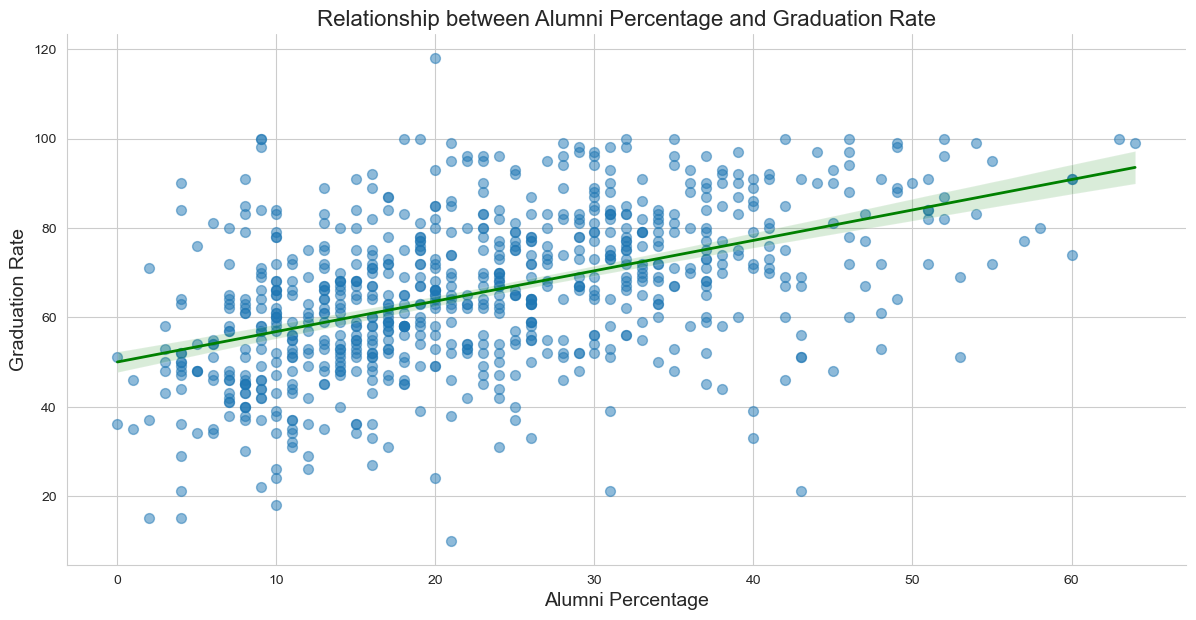

In [6]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='perc.alumni', y='Grad.Rate', height=6, aspect=2, 
           scatter_kws={'s': 50, 'alpha': 0.5}, # 's' is size of scatter points, 'alpha' is the transparency
           line_kws={'color': 'green', 'lw': 2}   # 'color' is color of line, 'lw' is line width
          )

# Set title and labels with enhanced font sizes
plt.title('Relationship between Alumni Percentage and Graduation Rate', fontsize=16)
plt.xlabel('Alumni Percentage', fontsize=14)
plt.ylabel('Graduation Rate', fontsize=14)
plt.show()

## How does an increasing Student to Faculty member ratio affect the Graduation rate of students in university?

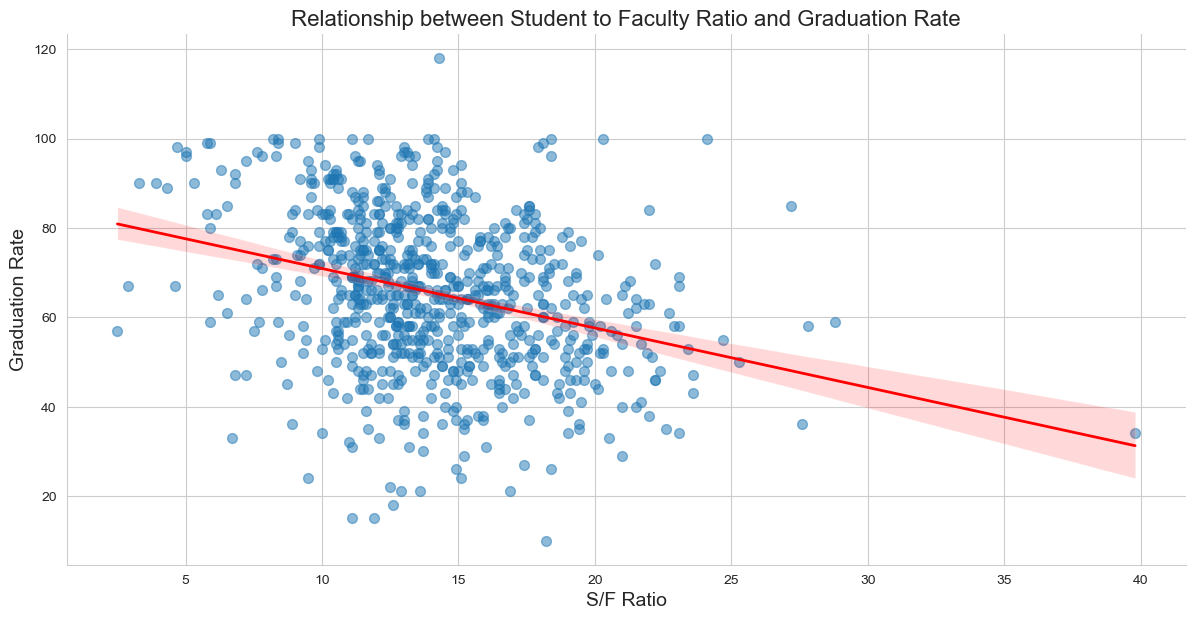

In [7]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x='S.F.Ratio', y='Grad.Rate', height=6, aspect=2, 
           scatter_kws={'s': 50, 'alpha': 0.5}, # 's' is size of scatter points, 'alpha' is the transparency
           line_kws={'color': 'red', 'lw': 2}   # 'color' is color of line, 'lw' is line width
          )

# Set title and labels with enhanced font sizes
plt.title('Relationship between Student to Faculty Ratio and Graduation Rate', fontsize=16)
plt.xlabel('S/F Ratio', fontsize=14)
plt.ylabel('Graduation Rate', fontsize=14)
plt.show()

## Notice that we have a graduation rate of >100%? (Not possible)

In [8]:
df.loc[df['Grad.Rate'] > 100, 'Grad.Rate'] = 100

## K Means Cluster Creation

In [9]:
from sklearn.cluster import KMeans

## Analyse Data

In [10]:
df.describe()

#Here we see that data is not standardised. 
#Since K means is a distance based algorithm (finding Euclidean distance between data points)
#- difference in magnitude can cause a problem

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.440154
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.118804
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.000000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.000000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


## Bring all values to the same magnitude by standardising data 

In [11]:
#Bring all values to the same magnitude by standardising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

In [12]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)


## See results of standardisation

In [13]:
scaled_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,0.060830,0.074141,0.117189,0.279564,0.514249,0.113030,0.039125,0.418423,0.406294,0.202041,0.166510,0.680634,0.732930,0.310716,0.355373,0.122046,0.616002
std,0.080607,0.093347,0.146166,0.185688,0.217635,0.153962,0.069724,0.207800,0.172871,0.073576,0.103370,0.171875,0.193715,0.106122,0.193622,0.098437,0.190209
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014475,0.020260,0.032563,0.147368,0.351648,0.027076,0.004305,0.257231,0.286412,0.166667,0.091603,0.568421,0.618421,0.241287,0.203125,0.067205,0.477778
50%,0.030763,0.039531,0.062765,0.231579,0.494505,0.049771,0.016121,0.395145,0.381463,0.180036,0.145038,0.705263,0.763158,0.297587,0.328125,0.097857,0.611111
75%,0.073793,0.089573,0.136385,0.357895,0.659341,0.122715,0.044241,0.546746,0.515448,0.224599,0.221374,0.810526,0.894737,0.375335,0.484375,0.144099,0.755556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Create a kmeans function and fit the scaled data to it

In [14]:
kmeans = KMeans(n_clusters=4, init="k-means++")
kmeans.fit(scaled_df)

KMeans(n_clusters=4)

## Inertia Value

In [15]:
kmeans.inertia_
#Inertia measures how well a dataset was clustered by K-Means.
#It is calculated by measuring the distance between each data point and its centroid, 
#squaring this distance, and summing these squares across one cluster.

#A good model is one with low inertia AND a low number of clusters (K). 
#However, this is a tradeoff because as K increases, inertia decreases.

160.54949774447562

## Visualising the Elbow Method (Using inertia values)

Text(0, 0.5, 'Inertia')

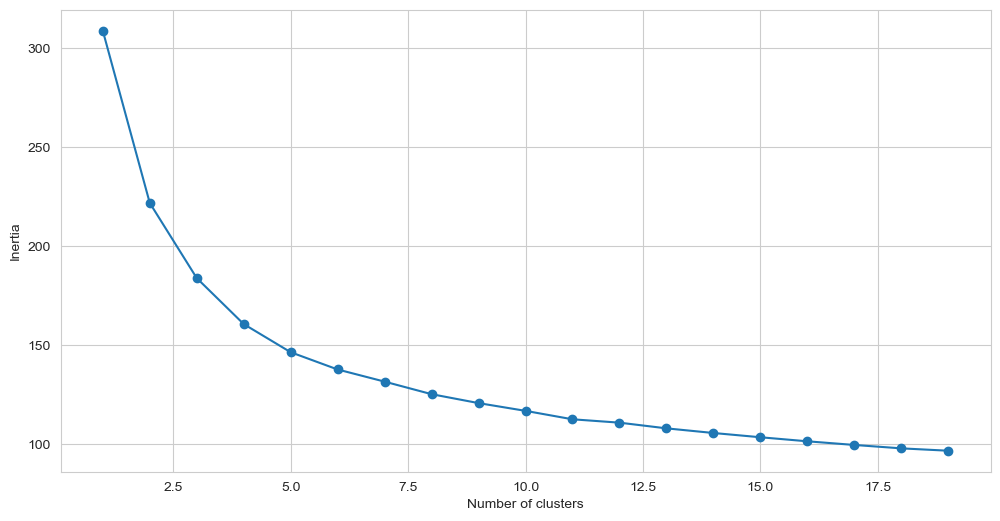

In [16]:
#SSE = Sum of Sqaured Error

#Append SSE after each K value is tried on each model
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)

#Visualising the Elbow Method
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

#If want a more concrete way of identifying the best k value
#use the silhouette score

## A more concrete way of finding the best K value

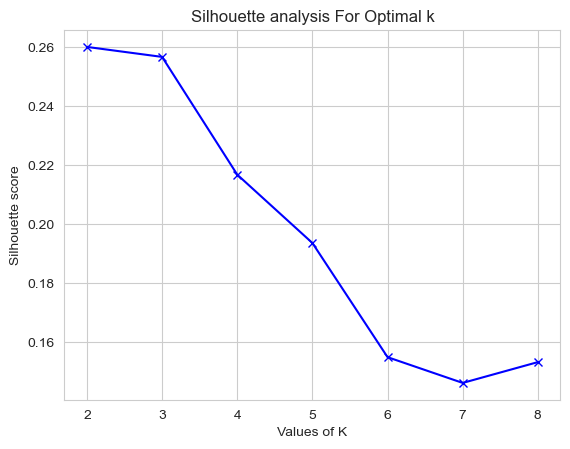

In [17]:
#If want a more concrete way of finding the best K value (Dont go into detail)

from sklearn.metrics import silhouette_score

k_values = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in k_values:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(scaled_df)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(scaled_df, cluster_labels))

plt.plot(k_values, silhouette_avg, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()


## Re-fitting the model with our new K value based on the Silhouette Score 

In [18]:
kmeans = KMeans(n_clusters=2, init="k-means++")
kmeans.fit(scaled_df)
predictions =kmeans.predict(scaled_df)

#Wont be going through the code below, only showing the results of changing k value

# Just to show how changing the K value based on silhouette score affects the models accuracy (Using labels in data)
    However, in reality we will not have these labels 
    (purely for demonstration purposes)

In [1]:
import pandas as pd
# Lineaer algebra library
import numpy as np
# Data visualisation
import matplotlib.pyplot as plt
# Statistical data visualisation
import seaborn as sns
%matplotlib inline

In [2]:
#This dataset has the labels on whether the uni is private or not
df2 = pd.read_csv('College_Data', index_col=0)

In [3]:
df2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
df2['Private'] = df2['Private'].apply(lambda x: 0 if x=='Yes' else 1)

In [5]:
df2.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
#Standardise data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df2 = scaler.fit_transform(df2)

In [7]:
#convert data to dataframe type
scaled_df2 = pd.DataFrame(scaled_df2, columns=df2.columns)

## Accuracy of our initial K value

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit(scaled_df2.drop('Private', axis=1))

# check how many of the samples were correctly labeled
labels = kmeans.labels_
y = scaled_df2['Private']
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 365 out of 777 samples were correctly labeled.
Accuracy score: 0.47


## Accuracy of our K value after visualising Silhouette score

In [9]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(scaled_df2.drop('Private', axis=1))

# check how many of the samples were correctly labeled
labels = kmeans.labels_
private_labels = scaled_df2['Private']
correct_labels = sum(private_labels == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, private_labels.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(private_labels.size)))

Result: 420 out of 777 samples were correctly labeled.
Accuracy score: 0.54
